In [1]:
import pandas
import datetime
import feather
import numpy
import scipy.optimize
import seaborn as sns
from davitpy import utils
from imagers.ssusi import ssusi_utils
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.colors import Normalize
from matplotlib import ticker
from matplotlib.dates import date2num, DateFormatter
%matplotlib inline
# import the sd-data overlay module
import os
import sys
module_path = os.path.abspath(os.path.join('../py/'))
if module_path not in sys.path:
    sys.path.append(module_path)
import sd_scan_muh

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
# Some constants
eventDate = datetime.datetime(2011, 7, 5)#datetime.datetime(2011,5,16)
timeStart = datetime.datetime(2011, 7, 5, 3, 0)#datetime.datetime(2011,5,16,7,0)
timeEnd = datetime.datetime(2011, 7, 5,7, 0)#datetime.datetime(2011,5,16,10,0)
sapsTime = datetime.datetime(2011, 7, 5, 4, 30)#datetime.datetime(2011,5,16,8,36)
# SD plot variables
sapsRadList = [ "cvw", "cve","fhw",\
               "fhe", "bks", "wal" ]#[ "cvw" ]
sddata_type = "raw_los" 
selBeam = 9
sapsMlatRange = [ 50., 62. ]#[ 56., 60. ]
sapsVelCutoff = 50.
sapsNpointsCutoff = 50 # per radar per beam
velScale = [ -500, 500 ]
# SSUSI plot variables
ssusiDir = "../data/dmsp/ssusi/prcsd/" # Make sure you have this dir or create it
ssusiTime = datetime.datetime( 2011, 7, 5, 4, 30 )
coords="mlt"
satList = ["F18" ]

In [3]:
# read velocities from the feather file
velsDF = feather.read_dataframe('../data/saps-' +\
                eventDate.strftime("%Y%m%d") + '.feather')
velsDF.head()

,dateStr,timeStr,beam,range,azimCalcMag,vLos,MLAT,MLON,MLT,GLAT,GLON,radId,radCode,date,normMLT
0,20110705,300,0,0,-7.8204,21.1500,39.2439,-145.2032,12.4690,44.3894,143.4903,40,hok,2011-07-05 03:00:00,-11.5310
1,20110705,300,0,1,-4.6284,18.5725,39.7470,-145.0795,12.4772,44.9081,143.6445,40,hok,2011-07-05 03:00:00,-11.5228
2,20110705,300,0,2,-2.9119,19.8473,40.1949,-144.9959,12.4828,45.3684,143.7537,40,hok,2011-07-05 03:00:00,-11.5172
3,20110705,300,0,3,-1.7818,5.4916,40.6224,-144.9279,12.4874,45.8067,143.8465,40,hok,2011-07-05 03:00:00,-11.5126
4,20110705,300,0,4,-0.9696,-0.8002,41.0394,-144.8684,12.4913,46.2334,143.9308,40,hok,2011-07-05 03:00:00,-11.5087


In [4]:
# Read SSUSI data
ssObj = ssusi_utils.UtilsSsusi( ssusiDir, eventDate )
fDict = ssObj.filter_data_by_time(ssusiTime, timeDelta=40.)

reading data from---> ../data/dmsp/ssusi/prcsd/F18/20110705.txt
reading data from---> ../data/dmsp/ssusi/prcsd/F17/20110705.txt
reading data from---> ../data/dmsp/ssusi/prcsd/F16/20110705.txt


2011-07-05 04:30:00 2011-07-05 04:32:00
2011-07-05 04:30:00 2011-07-05 04:32:00
2011-07-05 04:30:00 2011-07-05 04:32:00


ERROR:root:Sorry, we could not find any data for you :(
ERROR:root:Your pointer does not point to any data


converting from geo to aacgm coordinates


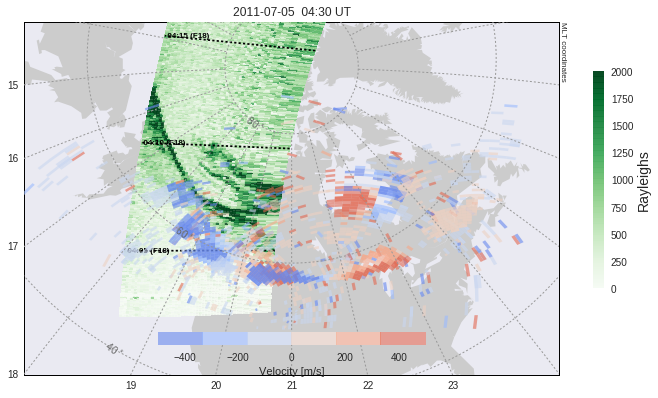

In [7]:

# PLOT DATA
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1,1,1)
m = utils.plotUtils.mapObj( coords=coords,\
                           lat_0=70., lon_0=-45, width=77e3*120,\
                           height=111e3*55, datetime=sapsTime)

# Overlay SD data
velSeaMap = ListedColormap( sns.color_palette("coolwarm") )
obj = sd_scan_muh.sdvel_on_map(m, ax, sapsRadList, sapsTime)
colNorm = Normalize( vmin=velScale[0], vmax=velScale[1] )
obj.overlay_raw_data(param="velocity", gsct=1,\
                     fill=True, vel_lim=velScale,\
                     zorder=9, cmap=velSeaMap, norm=colNorm, alpha=0.6)
#Overlay SSUSI data
ssusiPlot = ssObj.overlay_sat_data( fDict, m, ax, satList=satList,\
         inpTime=ssusiTime, vmin=0., vmax=2000.,\
            autoScale=False, coords=coords,alpha=0.8, cbar_shrink=0.5 )
cax = plt.colorbar(obj.losvel_mappable,ax=ax,cmap=velSeaMap,\
             orientation='horizontal', shrink=0.5, pad=-0.1)
cax.set_label('Velocity [m/s]')
fig.savefig("../plots/sd-ssusi-" +\
            sapsTime.strftime("%Y%m%d") +\
            ".pdf" ,bbox_inches='tight')